### AB TESTING FOR BETTER MARKETING STATEGY

In [16]:
# import the necessay library
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# load the dataset
df = pd.read_csv(r"C:\Users\User\Desktop\data_science bootcamp\Marketing Analytics\Datasets\WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv")

In [18]:
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


### Description of the dataset
. Market ID : unique identifier for market

. Market Size : size of market area by sales

. Location ID : unique identifier for store location

. Age Of Store : age of store in years

. Promotion : one of three promotions that was tested

. week : one of four weeks when the promotions were run

. Sales In Thousands : sales amount for specific LocationID, Promotion, and week

### Data analysis

#####
In this section, we are going to focus on understanding the distributions of sales, market sizes, store locations, and ages used to test different promotions.The goal of this analysis is to make sure the controls and attributes of each of the promotion groups are symmetrically distributed, so that the promotion performances among different groups are comparable to each other. 

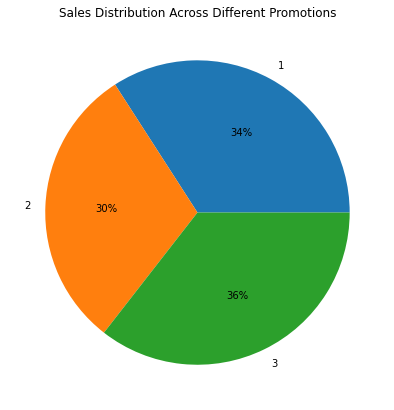

In [20]:
# The total sales distributions across different promotions can be visualized using the following code:
ax = df.groupby('Promotion').sum()['SalesInThousands'].plot.pie(figsize=(7, 7),autopct='%1.0f%%')
ax.set_ylabel('')
ax.set_title('Sales Distribution Across Different Promotions')
plt.show()

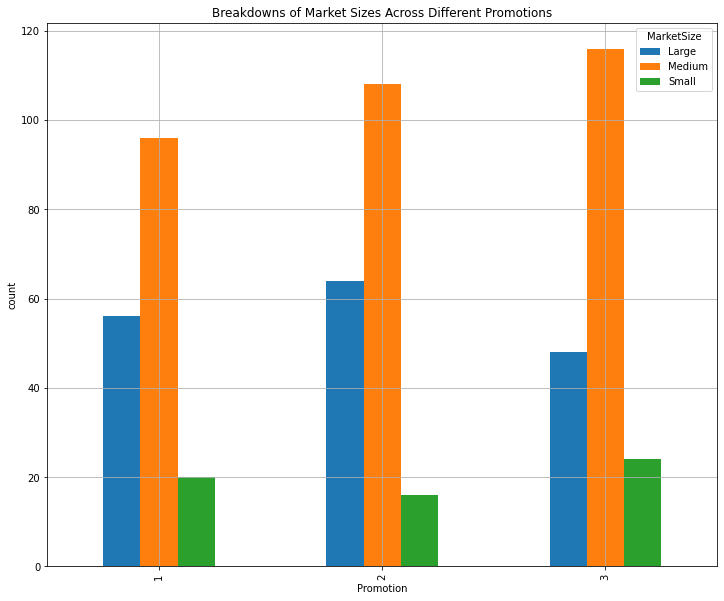

In [22]:
# We can also visualize the compositions of different market sizes in each promotion group. Take a look at the following code:
ax = df.groupby([ 'Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize').plot(kind='bar',figsize=(12,10),grid=True,
)
ax.set_ylabel('count')
ax.set_title('Breakdowns of Market Sizes Across Different Promotions')
plt.show()

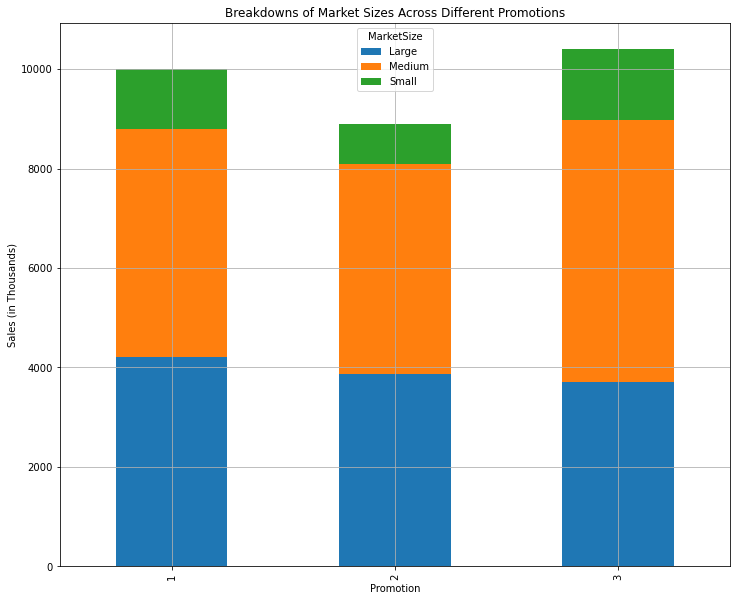

In [24]:
#You can use the following code to display this data in a stacked bar plot:
ax = df.groupby(['Promotion', 'MarketSize']).sum()['SalesInThousands'].unstack('MarketSize').plot(
kind='bar',
figsize=(12,10),
grid=True,
stacked=True)
ax.set_ylabel('Sales (in Thousands)')
ax.set_title('Breakdowns of Market Sizes Across Different Promotions')
plt.show()

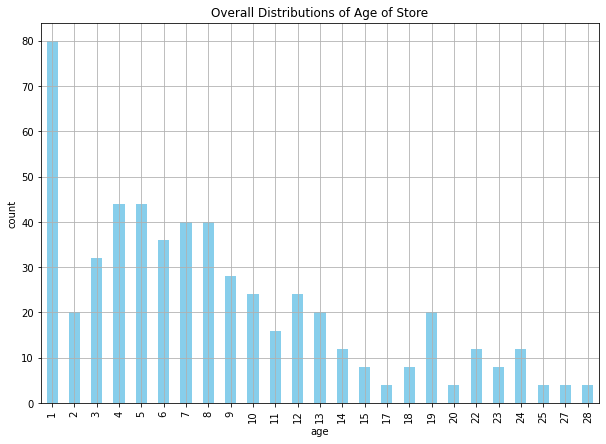

In [26]:
# Another attribute, "Age Of Store", and its overall distribution across all different promotions groups, can be 
# visualized by using the following code:
ax = df.groupby('AgeOfStore').count()['MarketID'].plot(kind='bar',color='skyblue',figsize=(10,7),grid=True)
ax.set_xlabel('age')
ax.set_ylabel('count')
ax.set_title('Overall Distributions of Age of Store')
plt.show()

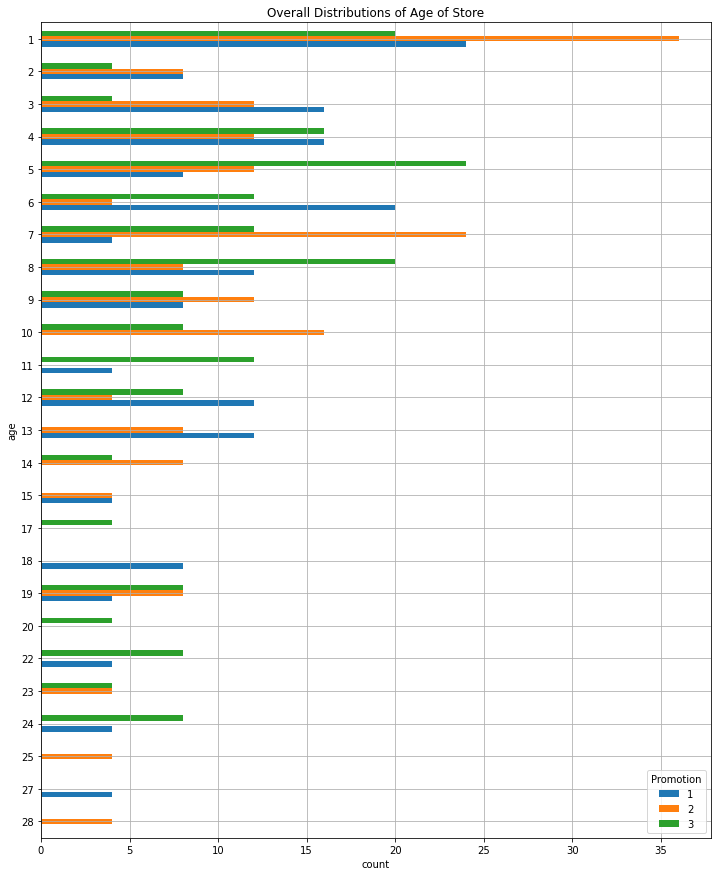

In [28]:
# However, what we are more interested in is whether the stores in the three different promotion groups have similar store age 
# profiles. Take a look at the following code:
ax = df.groupby(['AgeOfStore', 'Promotion']).count()['MarketID'].unstack('Promotion').iloc[::-1].plot(kind='barh',figsize=(12,15),grid=True)
ax.set_ylabel('age')
ax.set_xlabel('count')
ax.set_title('Overall Distributions of Age of Store')
plt.show()

In [29]:
#It will be easier to look at the summary statistics of store ages across the three promotion groups. Take a look at the following code:
df.groupby('Promotion').describe()['AgeOfStore']

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


By analyzing how each promotion or test group is comprised, we could verify that the store profiles are similar to each other.
This suggests that the sample groups are well controlled and the A/B testing results will be meaningful and trustworthy.

### Statistical hypothesis testing

In Python, there are two approaches to computing the t-value and p-value in a t-test. We will demonstrate both
approaches in this section, and it is up to you to decide which one works more conveniently for you. The two approaches
to compute the t-value and p-value for a t-test are as follow

### Computing t-value and p-value from the equations

In [30]:
# There are three things we need to compute to get the t-value—the mean, the standard deviation, and the number
# of samples. Take a look at the following code:
means = df.groupby('Promotion').mean()['SalesInThousands']
stds = df.groupby('Promotion').std()['SalesInThousands']
ns = df.groupby('Promotion').count()['SalesInThousands']

In [33]:
# we can compute the t-value for comparing the performances of promotion 1 and promotion 2. Take a look at the following code:
import numpy as np
t_1_vs_2 = (means.iloc[0] - means.iloc[1])/ np.sqrt(
(stds.iloc[0]**2/ns.iloc[0]) + (stds.iloc[1]**2/ns.iloc[1]))

In [34]:
t_1_vs_2

6.427528670907475

In [35]:
# we can get the pvalue with the following code:
from scipy import stats
df_1_vs_1 = ns.iloc[0] + ns.iloc[1] - 2
p_1_vs_2 = (1 - stats.t.cdf(t_1_vs_2, df=df_1_vs_1))*2

In [36]:
p_1_vs_2

4.143296816749853e-10

### Computing the t-value and p-value using scipy

In [41]:
# Another approach to computing the t-value and p-value is by using the stats module from the scipy package. 
# The ttest_ind function is udes to easily compute t-values and p-values to compare the marketing performances of different promotion or test groups
t, p = stats.ttest_ind(
df.loc[df['Promotion'] == 1, 'SalesInThousands'].values,
df.loc[df['Promotion'] == 2, 'SalesInThousands'].values,
equal_var=False
)